# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [10]:
# your code here- numerical variable
titanic.select_dtypes(exclude ='object').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [9]:
#your code here- categorical variable
titanic.select_dtypes(include ='object').head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [12]:
# your code here

plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12.0, 6.0]

#### Use the appropriate visulalization to show the distribution of the column `Age`

[Text(1, 0, 'Age')]

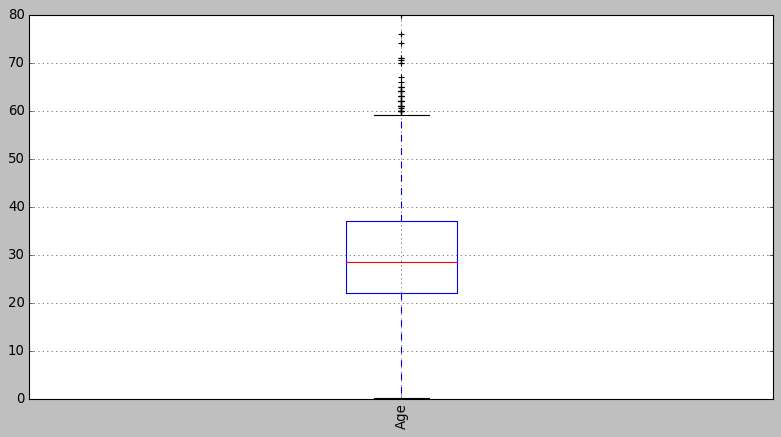

In [13]:
# your code here
age_plot = titanic.boxplot(column="Age")
age_plot.set_xticklabels(age_plot.get_xticklabels(),rotation=90)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

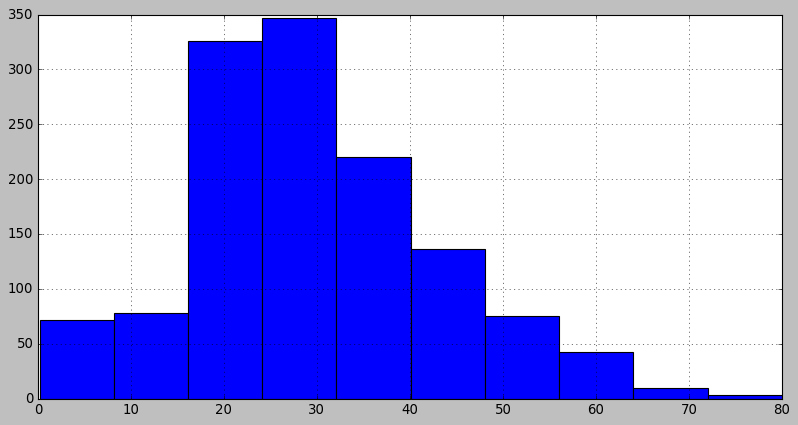

In [17]:
# your code here
titanic['Age'].hist(bins=10);

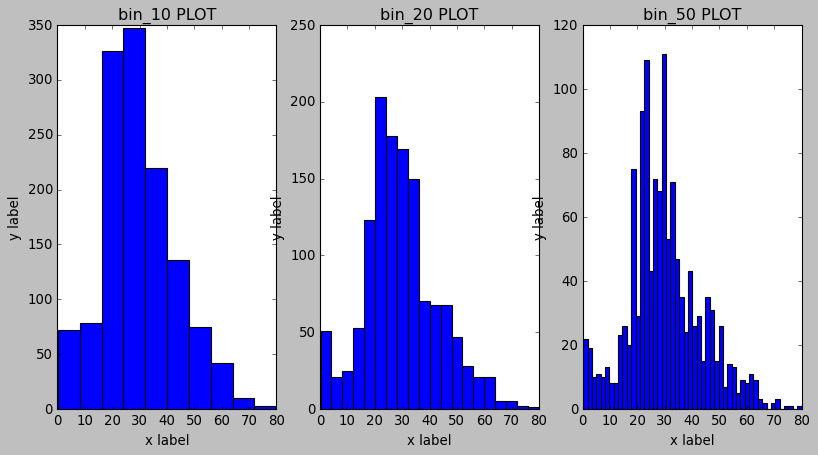

In [23]:
fig, [bin_50, bin_30, bin_20] = plt.subplots(1,3)



bin_50.hist(titanic['Age'],bins=10)
bin_50.set_title('bin_10 PLOT')   
bin_50.set_xlabel('x label')     
bin_50.set_ylabel('y label')

bin_30.hist(titanic['Age'],bins=20) # fignaam. 
bin_30.set_title('bin_20 PLOT')   
bin_30.set_xlabel('x label')     
bin_30.set_ylabel('y label')

bin_20.hist(titanic['Age'],bins=50)
bin_20.set_title('bin_50 PLOT')   
bin_20.set_xlabel('x label')     
bin_20.set_ylabel('y label')


plt.show()

#### Whether the bin size affects your plot? Why?

In [38]:
#your comment here
#No entiendo la pregunta,pero en todos los gráficos el tamaño cambia

#### Use seaborn to show the distribution of the column `Age`

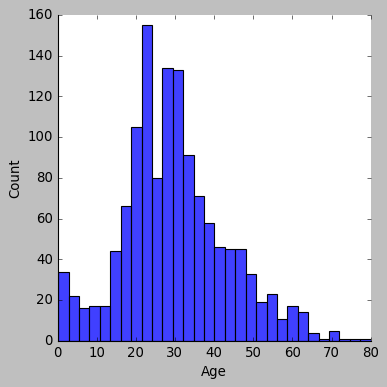

In [28]:
# your code here


sns.displot(titanic, x="Age", palette='Blues')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

In [ ]:
# your code here- 1st way
titanit.boxchart(x=)

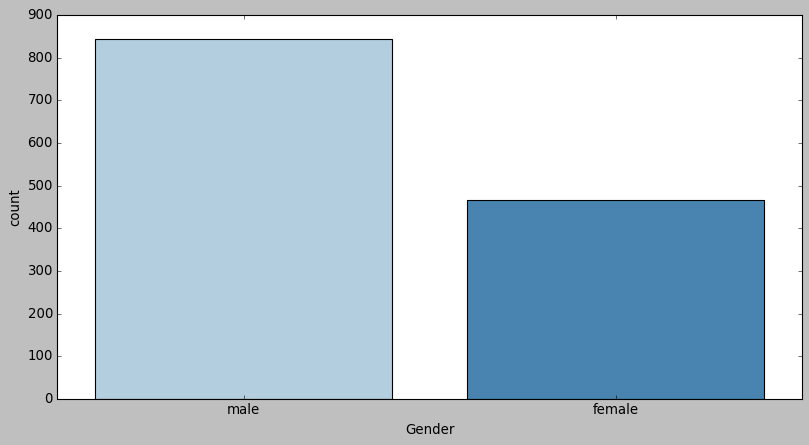

In [33]:
# your code here- 2nd way
sns.countplot(x=titanic.Gender, palette='Blues');

#### Use the appropriate plot to visualize the column `Pclass` 


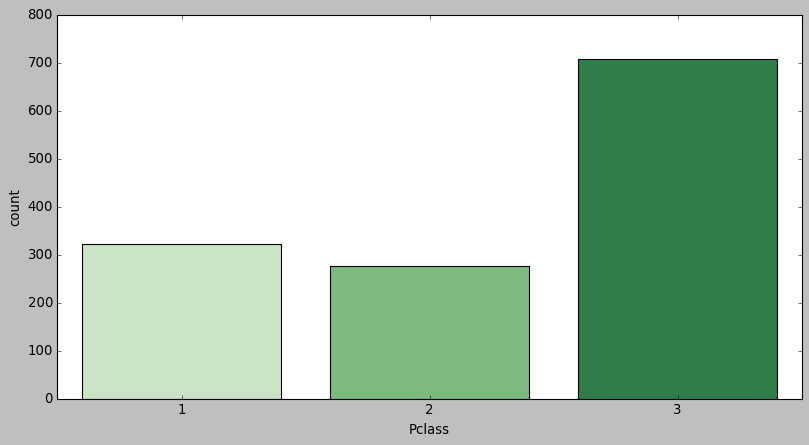

In [35]:
# your code here
sns.countplot(x=titanic.Pclass, palette='Greens');

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [ ]:
# your code here


#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [ ]:
#your code here


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [ ]:
#your code-1st way


In [ ]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [41]:
corr=titanic.corr() 

In [42]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


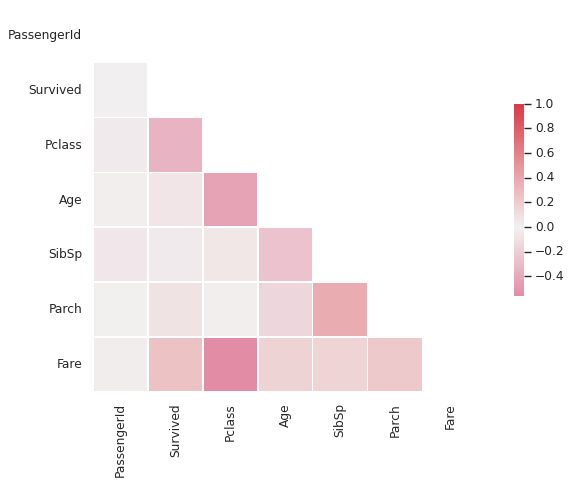

In [44]:
#your code here
sns.set(style='white')   # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))  # genera una mascara para la triangular superior

color_map=sns.diverging_palette(0, 10, as_cmap=True)  # paleta de colores


sns.heatmap(corr,  # mapa de calor
           mask=mascara,
           cmap=color_map,
           vmax=1,  # limite vertical
           center=0, 
           square=True,  # datos como cuadrados
           linewidth=.5, # ancho de linea
           cbar_kws={'shrink': .5}  # barra lateral
           );

#creo que no me sale bien

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#age with Pclass

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [40]:
#your code here
sns.displot(x=titanic[titanic.Age], 
              hue=titanic.Pclass,  # desagrupar, desagregar, sigue siendo un count
              palette='Blues')  # filtrar primero

plt.xticks(rotation=35);

KeyError: "None of [Float64Index([              22.0,               38.0,               26.0,\n                            35.0,               35.0, 23.926501618400003,\n                            54.0,                2.0,               27.0,\n                            14.0,\n              ...\n                   21.7628036173,                3.0,      32.6934168167,\n                            37.0,               28.0, 29.513190245700002,\n                            39.0,               38.5, 29.513190245700002,\n                   25.3154349722],\n             dtype='float64', length=1309)] are in the [columns]"

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

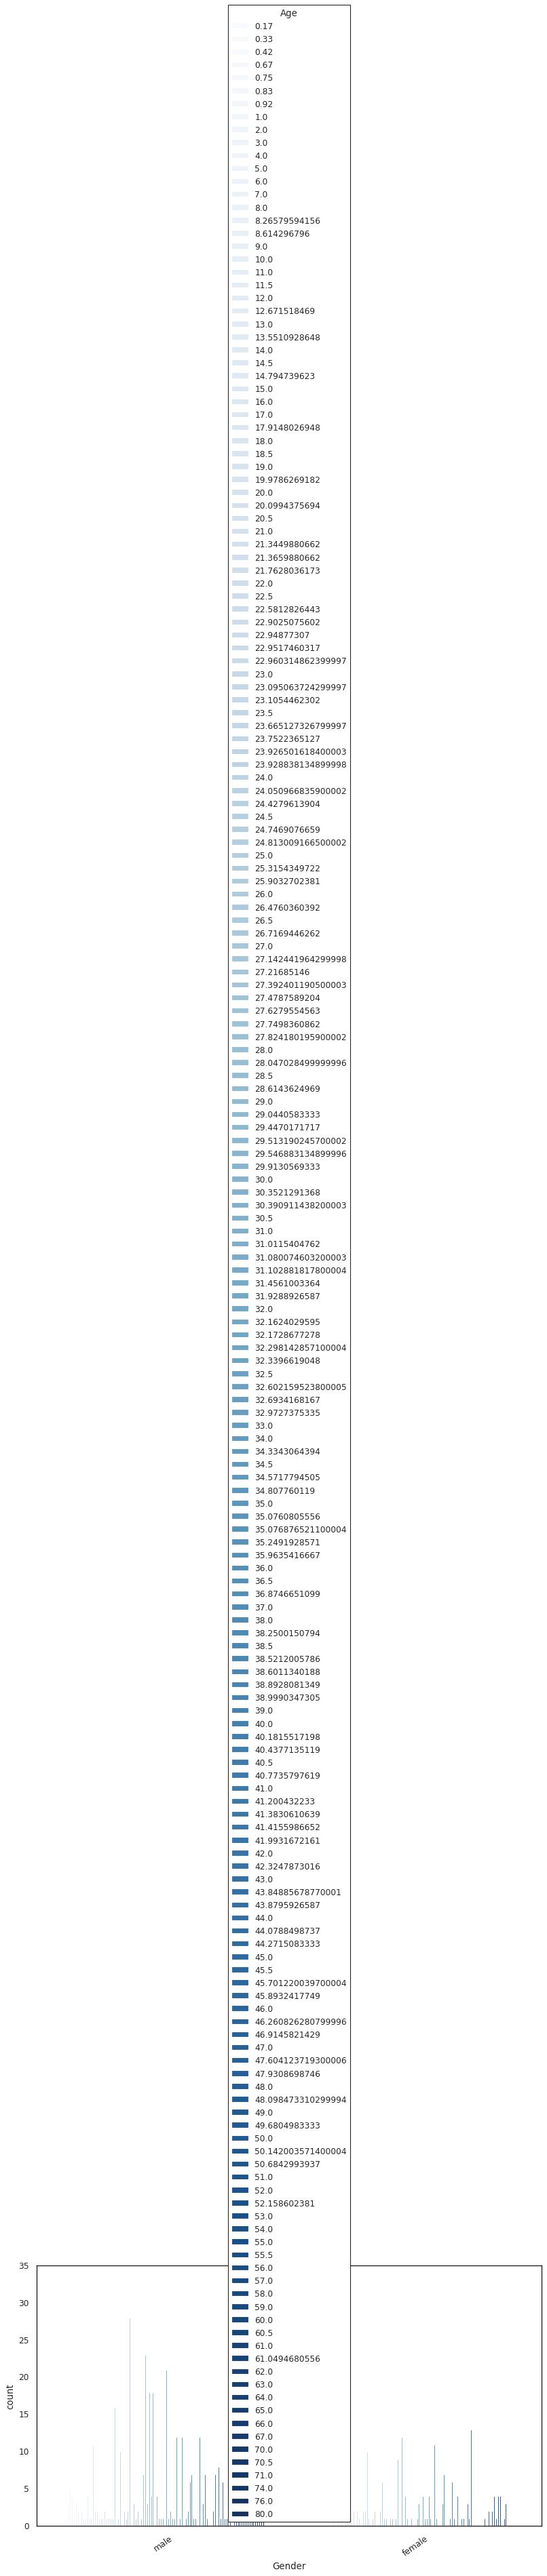

In [48]:
#your code here
sns.countplot(x=titanic.Gender, 
              hue=titanic.Age,  # desagrupar, desagregar, sigue siendo un count
              palette='Blues')  # filtrar primero

plt.xticks(rotation=35);